In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('audit_risk.csv')
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


###### Checking out the missing values

In [7]:
df.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

###### Dropping the missing values

In [41]:
df.dropna(axis=0, inplace=True)

###### Checking the shape

In [8]:
df.shape

(775, 27)

###### Check out the info

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    775 non-null    float64
 1   LOCATION_ID     775 non-null    object 
 2   PARA_A          775 non-null    float64
 3   Score_A         775 non-null    float64
 4   Risk_A          775 non-null    float64
 5   PARA_B          775 non-null    float64
 6   Score_B         775 non-null    float64
 7   Risk_B          775 non-null    float64
 8   TOTAL           775 non-null    float64
 9   numbers         775 non-null    float64
 10  Score_B.1       775 non-null    float64
 11  Risk_C          775 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        775 non-null    float64
 14  Risk_D          775 non-null    float64
 15  District_Loss   775 non-null    int64  
 16  PROB            775 non-null    float64
 17  RiSk_E          775 non-null    flo

###### Since the object datatype is an ID that can't be converted, we drop it 

In [42]:
df.drop('LOCATION_ID', axis = 1, inplace=True)

###### Function to remove outliers

In [9]:
def remove_outliers(cols):
    sorted(cols)
    Q1,Q3=np.percentile(cols,[25,75])
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)
    return lower,upper

###### Checking the Outliers

<ipython-input-34-809651841baa>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-34-809651841baa>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-34-809651841baa>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-34-809651841baa>:4: Runti

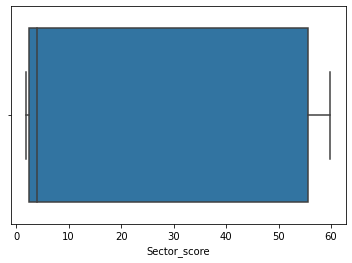

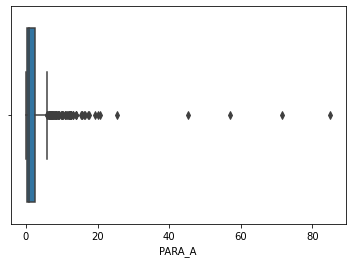

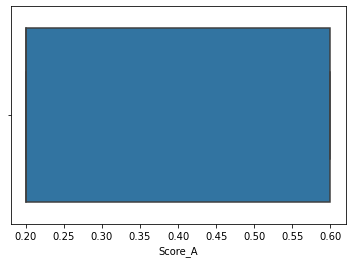

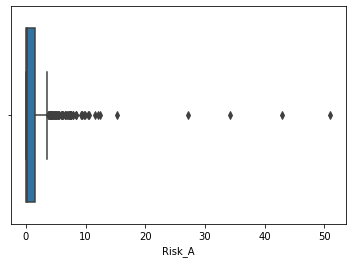

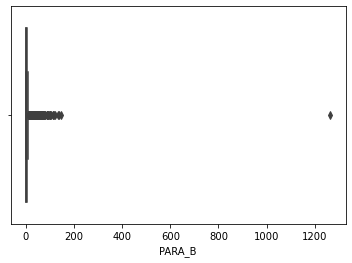

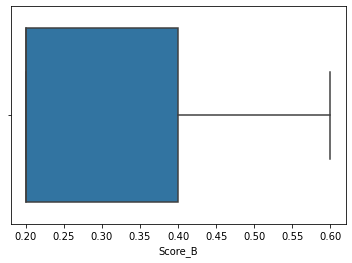

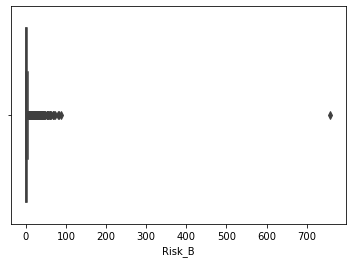

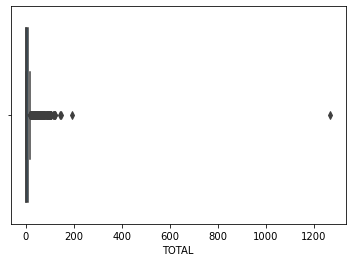

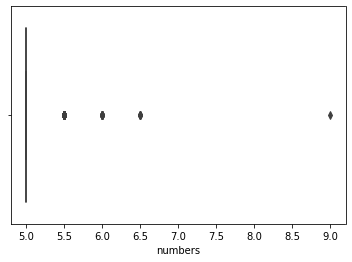

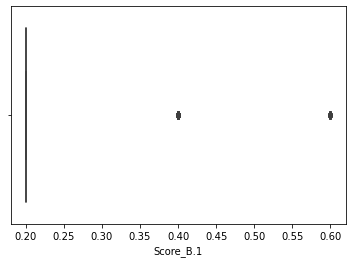

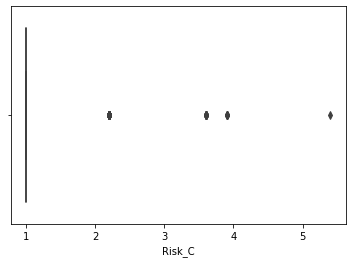

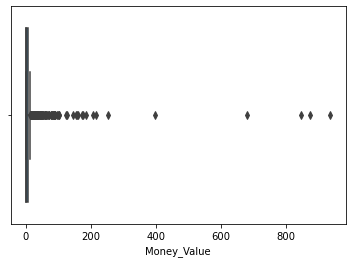

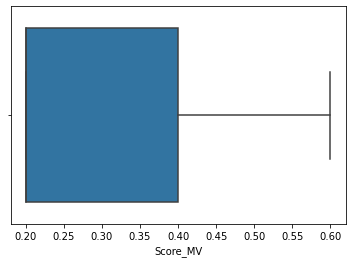

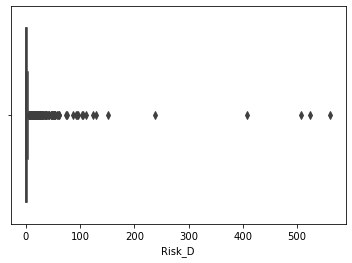

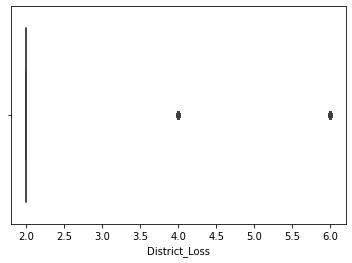

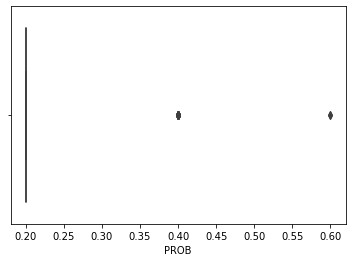

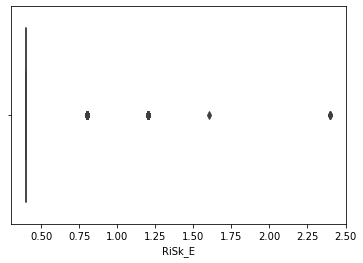

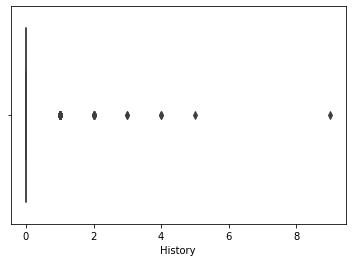

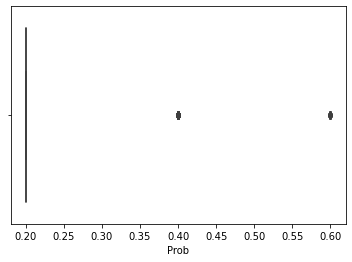

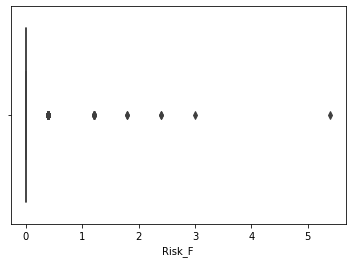

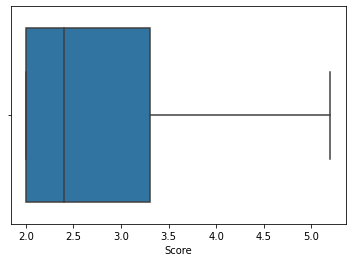

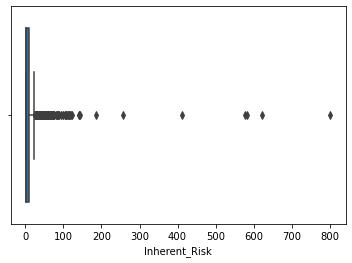

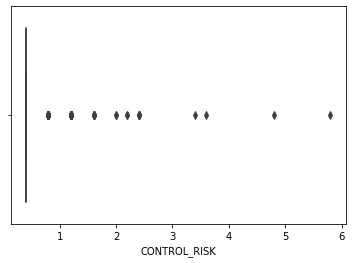

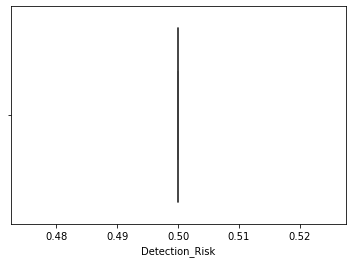

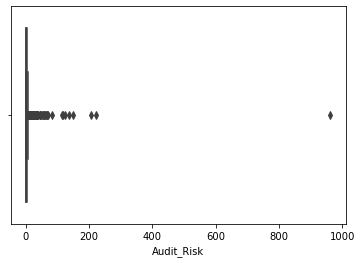

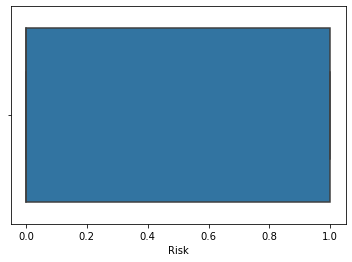

In [34]:
column = df.columns.to_list()

for i in df.columns:
    plt.figure(i)
    sns.boxplot(i, data=df)

###### Removing the Outliers

In [48]:
# from the above boxplot, this are the columns with outliers found in the Datasets 
outL = ['Audit_Risk', 'Inherent_Risk', 'Risk_D', 
           'Money_Value', 'TOTAL', 'Risk_B', 'PARA_B', 'Risk_A', 'PARA_A']

for i in outL:
    print(remove_outliers(df[i]))

(-4.0869, 7.6563)
(-12.0945, 24.3815)
(-3.357, 5.595000000000001)
(-8.392500000000002, 13.987500000000002)
(-10.2375, 18.502499999999998)
(-2.8305, 4.717499999999999)
(-6.24, 10.4)
(-2.1270000000000007, 3.657000000000001)
(-3.1950000000000003, 5.885)


###### checking the correlation between all the variables with respect to the Target variables

In [58]:
df.corr()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.216406,-0.424352,-0.218631,-0.132450,-0.218075,-0.130376,-0.153056,-0.151573,-0.170092,...,-0.127964,-0.114588,-0.136629,-0.103036,-0.336394,-0.172967,-0.154446,NaN,-0.091747,-0.393322
PARA_A,-0.216406,1.000000,0.496532,0.999267,0.161852,0.358352,0.161748,0.266952,0.133676,0.140521,...,0.118758,0.118195,0.172534,0.103904,0.426472,0.481784,0.149032,NaN,0.219695,0.378547
Score_A,-0.424352,0.496532,1.000000,0.504746,0.249325,0.572351,0.248079,0.297420,0.242533,0.274412,...,0.102278,0.177802,0.265185,0.150805,0.720233,0.320762,0.170536,NaN,0.201750,0.619383
Risk_A,-0.218631,0.999267,0.504746,1.000000,0.165202,0.362783,0.165060,0.270135,0.135506,0.142979,...,0.118463,0.121050,0.176061,0.106487,0.432332,0.483218,0.150616,NaN,0.221519,0.384869
PARA_B,-0.132450,0.161852,0.249325,0.165202,1.000000,0.347493,0.999936,0.994101,0.209799,0.230789,...,0.079290,0.203539,0.316494,0.196009,0.397111,0.654427,0.186625,NaN,0.887789,0.256920
Score_B,-0.218075,0.358352,0.572351,0.362783,0.347493,1.000000,0.348081,0.379242,0.277447,0.313651,...,0.014977,0.200734,0.309393,0.171172,0.901220,0.365532,0.127542,NaN,0.207886,0.635524
Risk_B,-0.130376,0.161748,0.248079,0.165060,0.999936,0.348081,1.000000,0.994023,0.209541,0.230486,...,0.079630,0.202780,0.316329,0.195254,0.396908,0.654480,0.186327,NaN,0.887565,0.255181
TOTAL,-0.153056,0.266952,0.297420,0.270135,0.994101,0.379242,0.994023,1.000000,0.217576,0.238164,...,0.089083,0.210702,0.326342,0.202114,0.433766,0.689743,0.197219,NaN,0.888093,0.291893
numbers,-0.151573,0.133676,0.242533,0.135506,0.209799,0.277447,0.209541,0.217576,1.000000,0.908132,...,0.136841,0.202276,0.209534,0.202340,0.502795,0.271044,0.228560,NaN,0.221416,0.308017
Score_B.1,-0.170092,0.140521,0.274412,0.142979,0.230789,0.313651,0.230486,0.238164,0.908132,1.000000,...,0.157464,0.226121,0.248353,0.223293,0.565941,0.308465,0.256442,NaN,0.259689,0.353664


###### Importing the model algorithm

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [50]:
x = df.drop('Risk', axis=1)
y = df.Risk

In [51]:
x.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832


###### Splitting the data

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)

###### Start Modeling

In [60]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\ATANSIEYE KOLADE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
prediction = model.predict(x_test)

###### Checking the score of the model

In [73]:
accuracy = accuracy_score(y_test, prediction)
print('Train performance: ', model.score(x_train, y_train))
print('Test Performance: ', accuracy)

Train performance:  0.996309963099631
Test Performance:  0.9871244635193133


In [66]:
confusion_matrix(y_test, prediction)

array([[138,   2],
       [  1,  92]], dtype=int64)

In [68]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       140
           1       0.98      0.99      0.98        93

    accuracy                           0.99       233
   macro avg       0.99      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233

